#1. Edge Detection

In [1]:
from google.colab import files
files.upload()

Saving car3.jpeg to car3.jpeg


{'car3.jpeg': b'\xff\xd8\xff\xdb\x00\x84\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x02\x1c\x03\xc0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x01\xa2\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x8

In [2]:
!ls -al

total 80
drwxr-xr-x 1 root root  4096 Jun  4 06:08 .
drwxr-xr-x 1 root root  4096 Jun  4 06:06 ..
-rw-r--r-- 1 root root 63506 Jun  4 06:08 car3.jpeg
drwxr-xr-x 4 root root  4096 Jun  1 13:40 .config
drwxr-xr-x 1 root root  4096 Jun  1 13:40 sample_data


In [3]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow

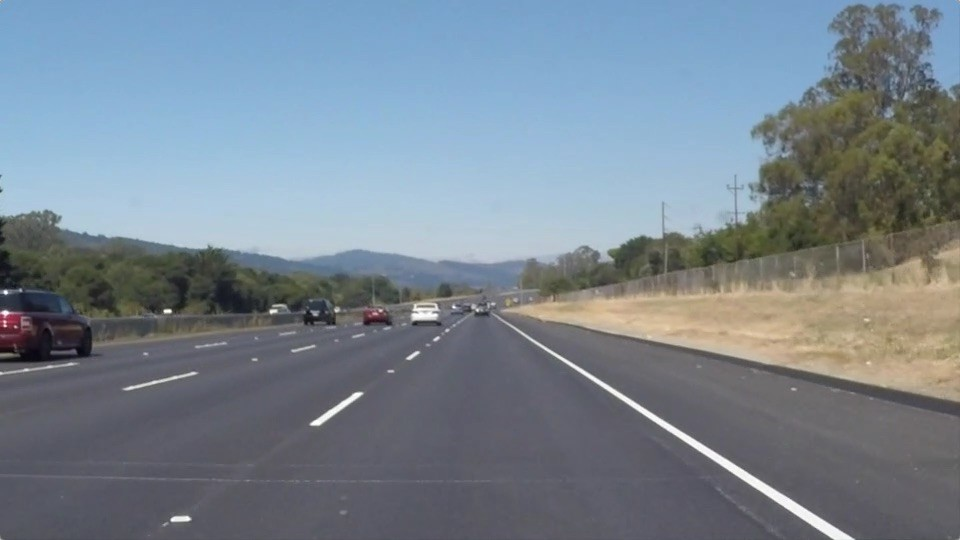

540 960 3


In [6]:
file_name = 'car3.jpeg'
frame = cv2.imread(file_name)
cv2_imshow(frame)
height, width, channels = frame.shape
print(height, width, channels)

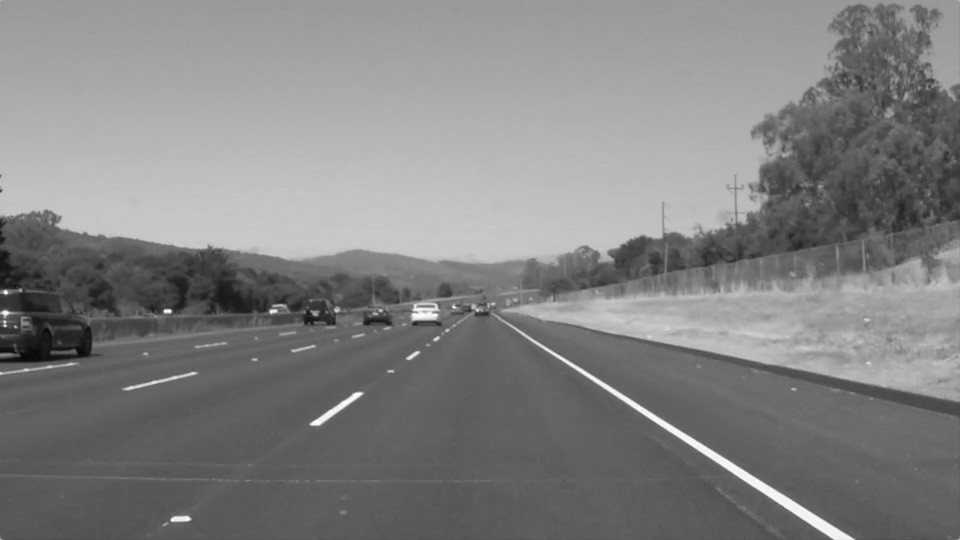

In [7]:
# convert the image to gray scale
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

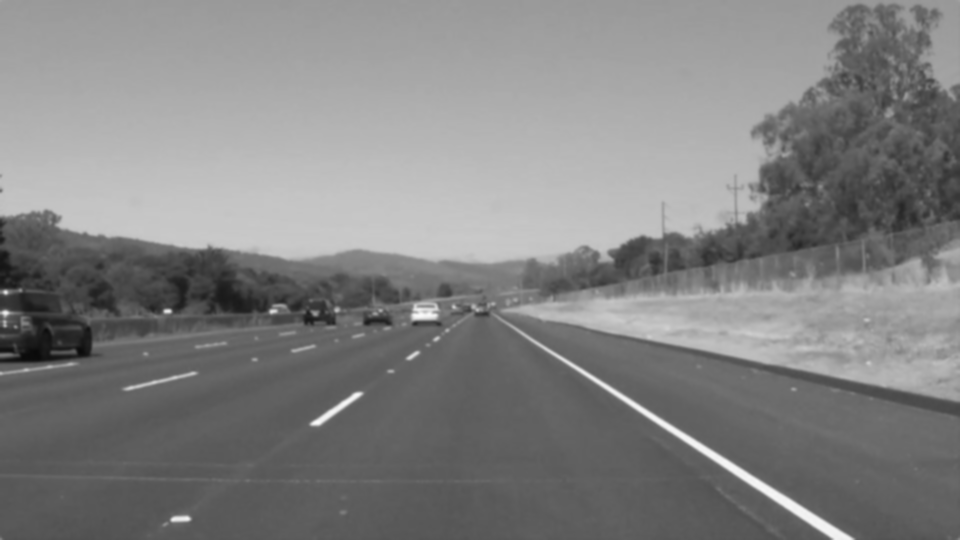

In [8]:
# GaussianBlur for reducing noise
blur = cv2.GaussianBlur(gray, (5,5), 0)
cv2_imshow(blur)

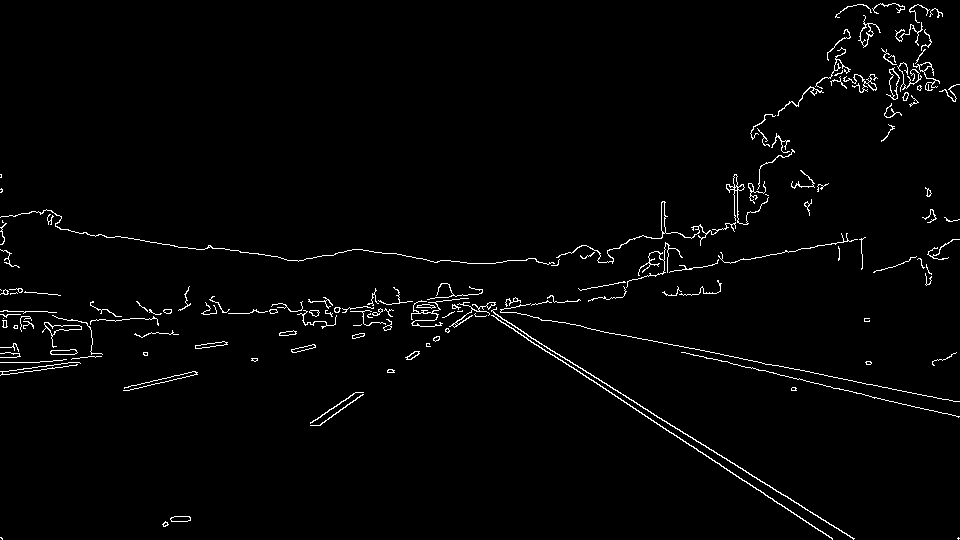

In [9]:
canny = cv2.Canny(blur, 40, 130)
cv2_imshow(canny)

#2. Region of Interest

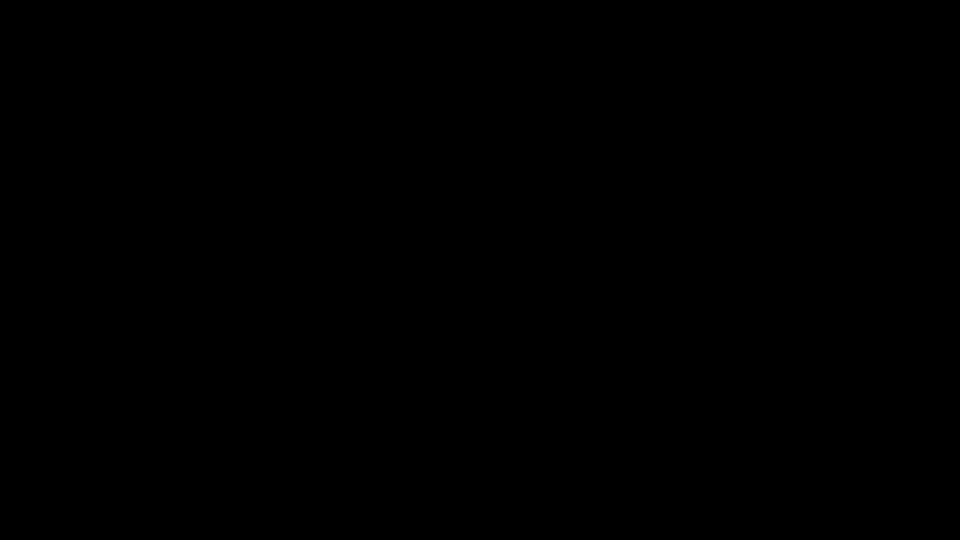

In [10]:
mask = np.zeros((height,width), dtype='uint8')
cv2_imshow(mask)

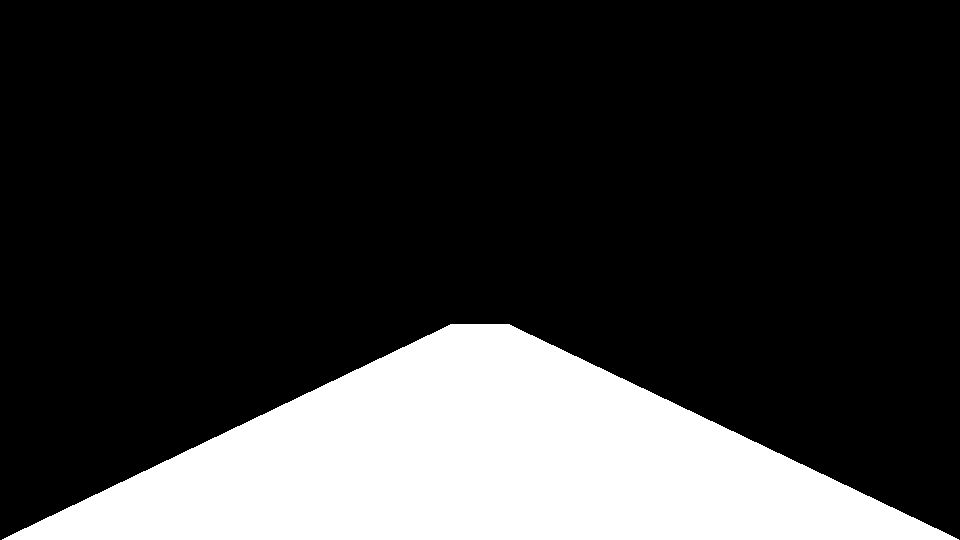

In [12]:
poly_height = int(0.60 * height)
poly_left = int(0.47 * width)
poly_right = int(0.53 * width)
polygons = np.array([[(0,height),(poly_left, poly_height), (poly_right, poly_height), (width, height)]])
cv2.fillPoly(mask, polygons, 255)
cv2_imshow(mask)

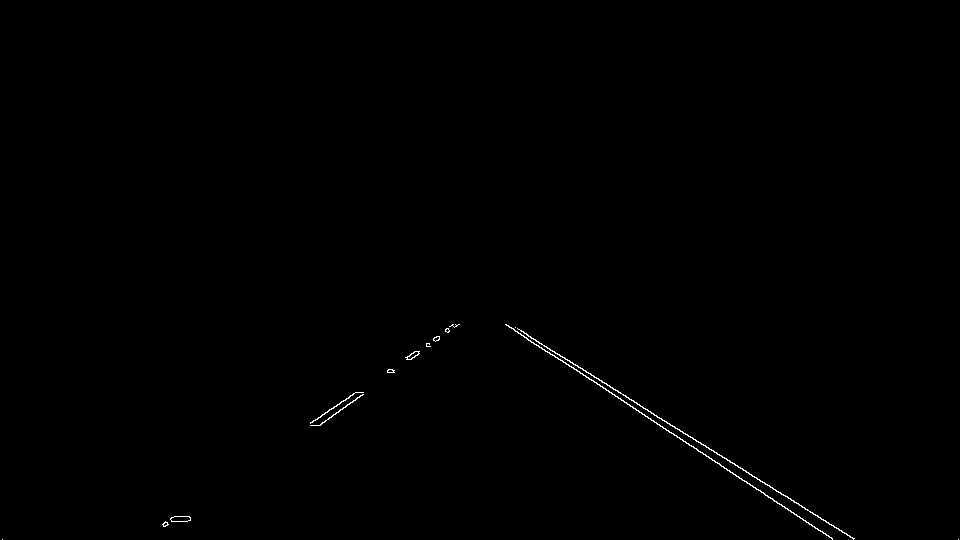

In [14]:
# bitwise operation between poly and mask
masked = cv2.bitwise_and(canny, mask)
cv2_imshow(masked)

#3. Lane Detection

In [15]:
lines = cv2.HoughLinesP(masked, 2, np.pi/180, 20, np.array([]), 20, 10)

[[517 328 854 538]]
[[506 324 526 337]]
[[505 324 793 512]]
[[310 423 356 392]]
[[406 359 453 324]]
[[319 425 362 394]]
[[409 359 439 339]]
[[765 495 828 535]]
[[318 425 363 392]]
[[629 399 781 494]]
[[408 359 458 324]]
[[800 518 832 538]]
[[410 359 438 340]]
[[767 485 824 520]]
[[593 380 656 422]]
[[623 395 643 407]]
[[555 352 586 372]]
[[426 343 449 326]]
[[164 522 187 521]]
[[322 414 355 392]]
[[436 337 456 325]]
[[660 418 688 435]]
[[538 345 564 362]]


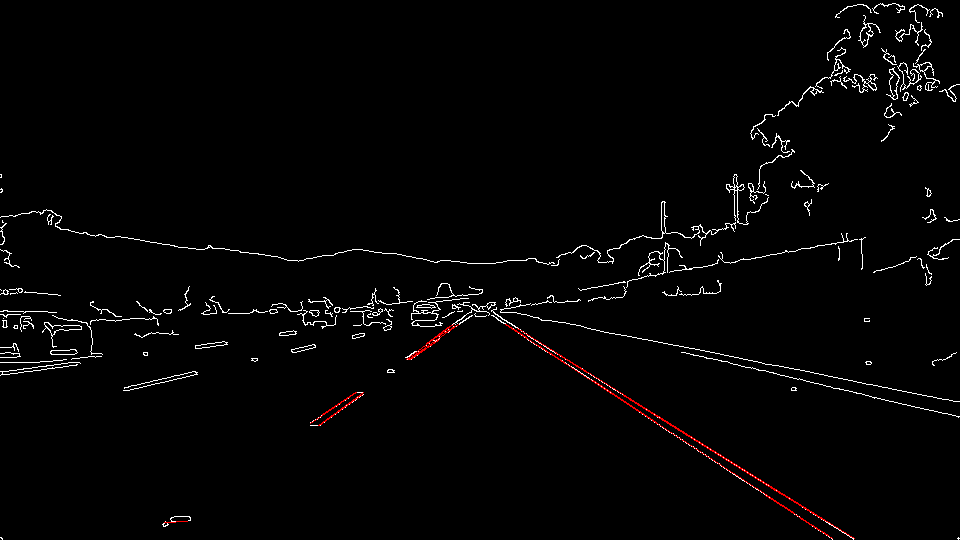

In [17]:
image_rgb = cv2.cvtColor(canny, cv2.COLOR_GRAY2RGB)
if lines is not None:
  for line in lines:
    print(line)
    x1, y1, x2, y2 = line.reshape(4)
    cv2.line(image_rgb, (x1,y1), (x2,y2), (0,0,255), 1)
  cv2_imshow(image_rgb)

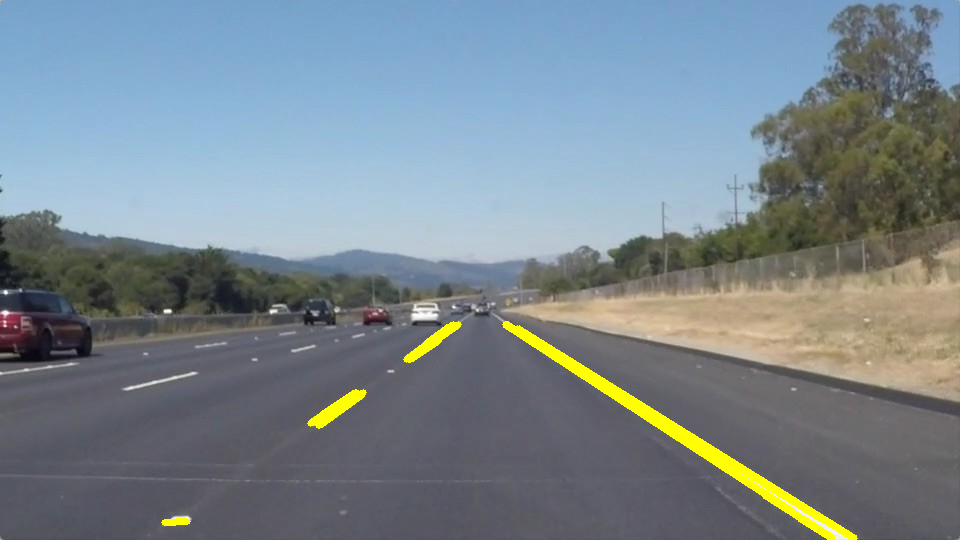

In [18]:
for line in lines:
  for x1, y1, x2, y2 in line:
    cv2.line(frame, (x1,y1), (x2,y2), (0,255,255), 5)
cv2_imshow(frame)